In [ ]:
import pandas as pd
#from apyori import apriori
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [ ]:

#from google.colab import drive
#drive.mount('/content/drive')
#ruta = "/content/drive/MyDrive/transactions.csv"
df = pd.read_csv("https://raw.githubusercontent.com/omarmendoza564/datos/refs/heads/main/datos/transactions.csv",header=None)

df.head(15)


,0,1,2,3,4,5,6
0,Pan,Leche,Mantequilla,Vino,Aceite,NaN,NaN
1,Pan,Pañal,Cerveza,Huevos,NaN,NaN,NaN
2,Pan,Pañal,Cerveza,Huevos,NaN,NaN,NaN
3,Leche,Pañal,Cerveza,Coca-Cola,NaN,NaN,NaN
4,Pan,Leche,Pañal,Coca-Cola,Vino,Aceite,Mantequilla
5,Pan,Leche,Pañal,Cerveza,Vino,NaN,NaN
6,Pan,Leche,Pañal,Coca-Cola,NaN,NaN,NaN
7,Pan,Pañal,Cerveza,Huevos,NaN,NaN,NaN
8,Leche,Pañal,Cerveza,Coca-Cola,Mantequilla,NaN,NaN
9,Pan,Leche,Pañal,Coca-Cola,NaN,NaN,NaN


In [ ]:
# Convertir el df en una lista para el algoritmo apriori

transactions =df.applymap(str).values.tolist()
transactions = [[item for item in transaction if item != "nan"] for transaction in transactions]

transactions

<ipython-input-18-4f3adcc04a07>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  transactions =df.applymap(str).values.tolist()


[['Pan', 'Leche', 'Mantequilla', 'Vino', 'Aceite'],
 ['Pan', 'Pañal', 'Cerveza', 'Huevos'],
 ['Pan', 'Pañal', 'Cerveza', 'Huevos'],
 ['Leche', 'Pañal', 'Cerveza', 'Coca-Cola'],
 ['Pan', 'Leche', 'Pañal', 'Coca-Cola', 'Vino', 'Aceite', 'Mantequilla'],
 ['Pan', 'Leche', 'Pañal', 'Cerveza', 'Vino'],
 ['Pan', 'Leche', 'Pañal', 'Coca-Cola'],
 ['Pan', 'Pañal', 'Cerveza', 'Huevos'],
 ['Leche', 'Pañal', 'Cerveza', 'Coca-Cola', 'Mantequilla'],
 ['Pan', 'Leche', 'Pañal', 'Coca-Cola'],
 ['Leche', 'Pañal', 'Cerveza', 'Coca-Cola'],
 ['Pan', 'Leche', 'Pañal', 'Cerveza'],
 ['Pan', 'Leche', 'Pañal', 'Coca-Cola', 'Mantequilla'],
 ['Pan', 'Leche', 'Pañal', 'Coca-Cola'],
 ['Pan', 'Leche', 'Pañal', 'Coca-Cola', 'Aceite', 'Mantequilla'],
 ['Pan', 'Leche', 'Pañal', 'Cerveza', 'Vino'],
 ['Leche', 'Pañal', 'Cerveza', 'Coca-Cola', 'Mantequilla', 'Vino', 'Aceite'],
 ['Pan', 'Leche', 'Pañal', 'Coca-Cola'],
 ['Pan', 'Leche', 'Pañal', 'Coca-Cola', 'Mantequilla'],
 ['Pan', 'Pañal', 'Cerveza', 'Huevos'],
 ['Pan', 'L

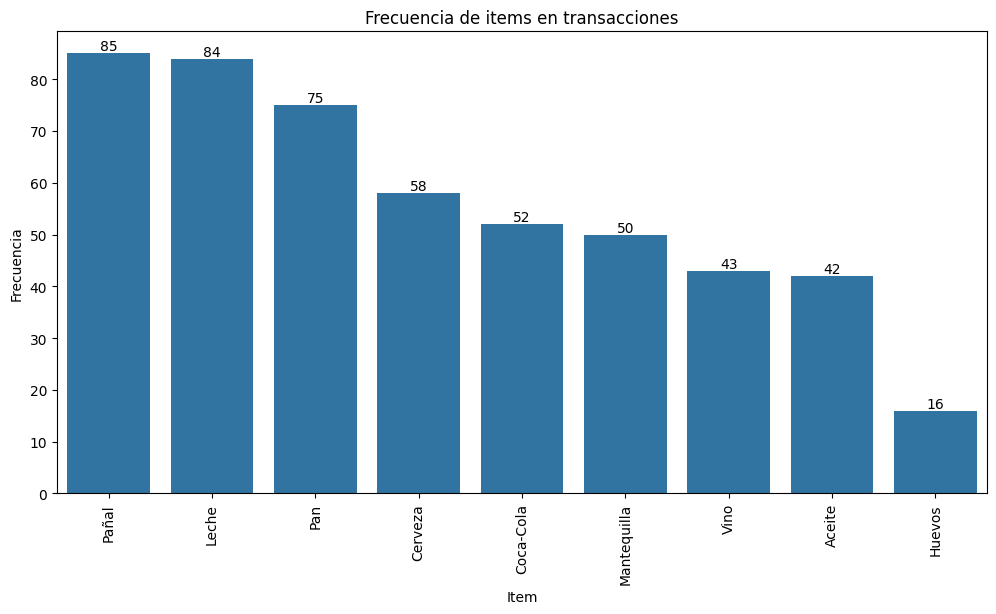

In [ ]:
from collections import Counter
item_counts = Counter([i for t in transactions for i in t])
item_df= pd.DataFrame(item_counts.items(),
                      columns=["Item", "Frecuencia"])\
                      .sort_values(by="Frecuencia", ascending=False)
plt.figure(figsize=(12,6))
ax = sns.barplot(x="Item", y="Frecuencia", data=item_df)
ax.bar_label(ax.containers[0],fontsize=10)
plt.xticks(rotation=90)
plt.title("Frecuencia de items en transacciones")
plt.show()

In [ ]:
num_items_per_transaction = [len(t) for t in transactions]
num_items_per_transaction = pd.Series(num_items_per_transaction)
display(num_items_per_transaction.describe(percentiles=[0.25, 0.5, 0.75]))

,0
count,100.00000
mean,5.05000
std,1.37345
min,2.00000
25%,4.00000
50%,5.00000
75%,6.00000
max,7.00000


<Axes: xlabel='None', ylabel='Count'>

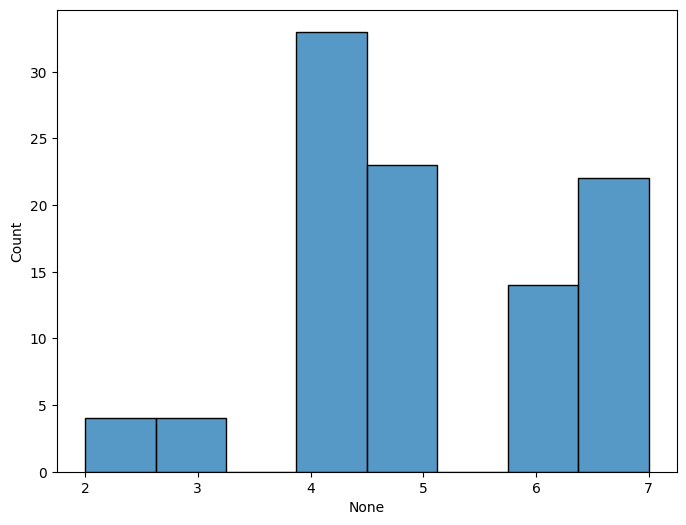

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(x=num_items_per_transaction)

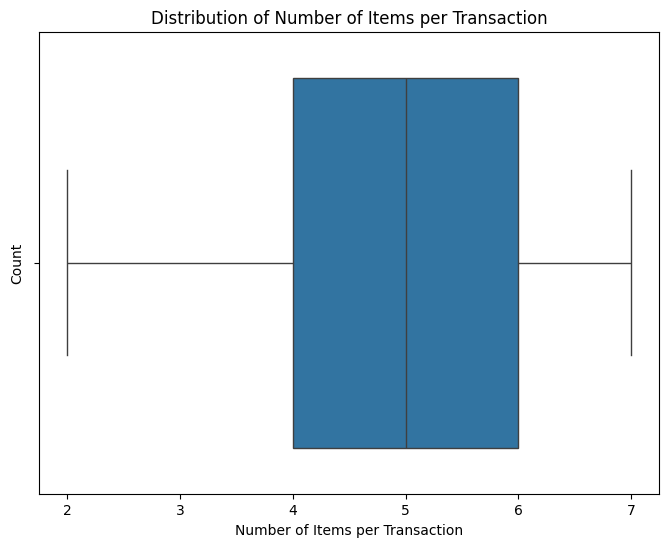

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x=num_items_per_transaction)
plt.xlabel('Number of Items per Transaction')
plt.ylabel('Count')
plt.title('Distribution of Number of Items per Transaction')
plt.show()

In [ ]:
#Encoder
encoder=TransactionEncoder()
transactions_encoded=encoder.fit(transactions).transform(transactions)
transactions_encoded=pd.DataFrame(transactions_encoded,columns=encoder.columns_)
transactions_encoded

,Aceite,Cerveza,Coca-Cola,Huevos,Leche,Mantequilla,Pan,Pañal,Vino
0,True,False,False,False,True,True,True,False,True
1,False,True,False,True,False,False,True,True,False
2,False,True,False,True,False,False,True,True,False
3,False,True,True,False,True,False,False,True,False
4,True,False,True,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...
95,True,False,True,False,True,True,True,True,True
96,True,True,True,False,True,False,False,True,False
97,True,True,True,False,True,True,False,True,True
98,False,False,True,False,True,True,True,True,False


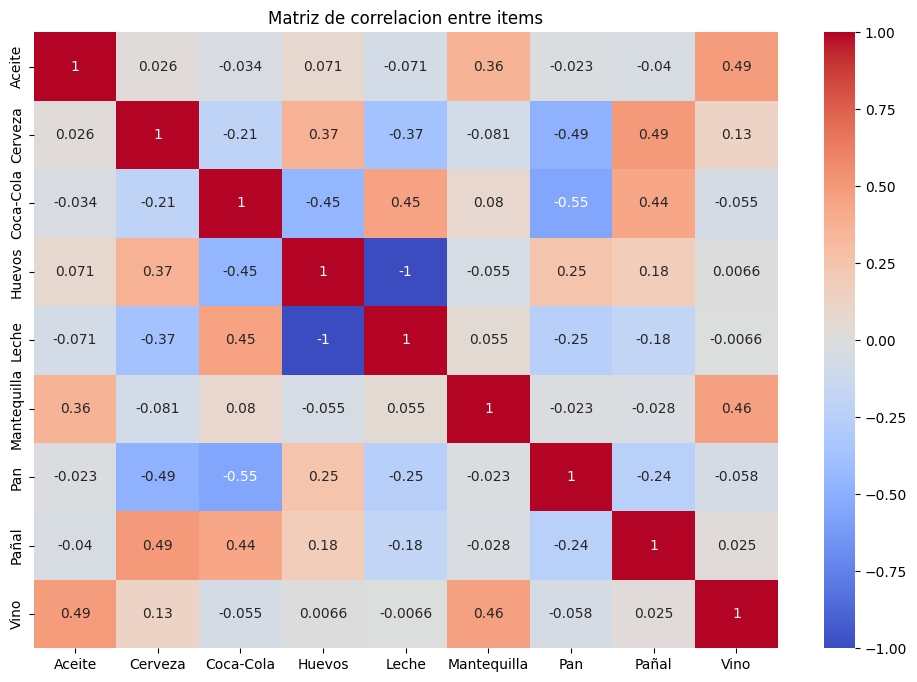

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(transactions_encoded.corr(),annot=True, cmap="coolwarm")
plt.title("Matriz de correlacion entre items")
plt.show()
#Estamos buscando los patrones de asociacion y esperabamos que no hubiera correlacion.
#Si hay mucha correlacion hay items que son frecuentes entre ellos

In [ ]:
#Porcentaje de item en transacciones
transactions_encoded.mean(axis=0).sort_values(ascending=False)
#Lo que mas hay en nuestro data set en este caso los pañales

,0
Pañal,0.85
Leche,0.84
Pan,0.75
Cerveza,0.58
Coca-Cola,0.52
Mantequilla,0.50
Vino,0.43
Aceite,0.42
Huevos,0.16


In [ ]:
#Identificar items frecuentes
#El soporte lo define el modelo de negocio, lo que buscamos es el porcentaje de veces que aparece un elemento,
#"Probabilidad de encontrar ese item en la compro o registro de compra de X usuario"
soporte=30/transactions_encoded.shape[0]
print(f"soporte minimo {soporte}")
itemsets = apriori(transactions_encoded, min_support=soporte, use_colnames=True)
print(itemsets.shape)
itemsets.sort_values(by="support", ascending=False)


soporte minimo 0.3
(35, 2)


,support,itemsets
6,0.85,(Pañal)
3,0.84,(Leche)
5,0.75,(Pan)
20,0.69,"(Pañal, Leche)"
25,0.60,"(Pañal, Pan)"
19,0.59,"(Leche, Pan)"
1,0.58,(Cerveza)
15,0.58,"(Pañal, Cerveza)"
16,0.52,"(Coca-Cola, Leche)"
17,0.52,"(Pañal, Coca-Cola)"


In [ ]:
#Top 10 itemsets con mayor soporte
itemsets.sort_values(by="support", ascending=False).head(10)

,support,itemsets
6,0.85,(Pañal)
3,0.84,(Leche)
5,0.75,(Pan)
20,0.69,"(Pañal, Leche)"
25,0.60,"(Pañal, Pan)"
19,0.59,"(Leche, Pan)"
1,0.58,(Cerveza)
15,0.58,"(Pañal, Cerveza)"
16,0.52,"(Coca-Cola, Leche)"
17,0.52,"(Pañal, Coca-Cola)"


In [ ]:
#Top 10 itemsets con al menos 2 items con mayor soporte
itemsets["n_items"]=itemsets["itemsets"].apply(lambda x: len(x))
itemsets.query("n_items >= 2").sort_values(by="support", ascending=False).head(10)

,support,itemsets,n_items
20,0.69,"(Pañal, Leche)",2
25,0.60,"(Pañal, Pan)",2
19,0.59,"(Leche, Pan)",2
15,0.58,"(Pañal, Cerveza)",2
16,0.52,"(Coca-Cola, Leche)",2
30,0.52,"(Pañal, Coca-Cola, Leche)",3
17,0.52,"(Pañal, Coca-Cola)",2
33,0.44,"(Pañal, Leche, Pan)",3
18,0.43,"(Leche, Mantequilla)",2
28,0.42,"(Pañal, Leche, Cerveza)",3


In [ ]:
#items que contienen manqtequilla
mask=itemsets["itemsets"].map(lambda x: "Mantequilla" in x)
itemsets.loc[mask].sort_values(by="support", ascending=False)

,support,itemsets,n_items
4,0.50,(Mantequilla),1
18,0.43,"(Leche, Mantequilla)",2
23,0.42,"(Pañal, Mantequilla)",2
22,0.37,"(Mantequilla, Pan)",2
32,0.35,"(Pañal, Leche, Mantequilla)",3
24,0.33,"(Mantequilla, Vino)",2
9,0.30,"(Mantequilla, Aceite)",2
31,0.30,"(Leche, Mantequilla, Pan)",3


In [ ]:
#Items que contienen Vino y Pañal
items=["Vino","Pañal"]
mask=itemsets["itemsets"].map(lambda x: x.issuperset(items))
itemsets.loc[mask].sort_values(by="support", ascending=False)

,support,itemsets,n_items
27,0.37,"(Pañal, Vino)",2
34,0.30,"(Pañal, Leche, Vino)",3


In [ ]:
#Crear reglas de asociacion
confianza = 0.7
rules = association_rules(itemsets, metric="confidence", min_threshold=confianza)
print(f"Numero de reglas generadas{len(rules)}")
rules.sort_values(by="confidence")
#Antecedent support = probabilidad de antecedents, Cosequent suppport probabilidad de consequents,
#support probabilidad de que compren antecedents y lleven consequents y
#lift es la casualidad si es mayor de 1 no es una casualidad y hay una relacion
#Soporte bajo confianza alta es lo normal

Numero de reglas generadas38


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
33,(Mantequilla),"(Pañal, Leche)",0.50,0.69,0.35,0.700000,1.014493,0.0050,1.033333,0.028571
10,(Leche),(Pan),0.84,0.75,0.59,0.702381,0.936508,-0.0400,0.840000,-0.297619
18,(Pañal),(Pan),0.85,0.75,0.60,0.705882,0.941176,-0.0375,0.850000,-0.294118
1,(Aceite),(Mantequilla),0.42,0.50,0.30,0.714286,1.428571,0.0900,1.750000,0.517241
4,(Aceite),(Vino),0.42,0.43,0.30,0.714286,1.661130,0.1194,1.995000,0.686207
20,(Vino),(Pan),0.43,0.75,0.31,0.720930,0.961240,-0.0125,0.895833,-0.066068
5,(Cerveza),(Leche),0.58,0.84,0.42,0.724138,0.862069,-0.0672,0.580000,-0.275862
24,(Cerveza),"(Pañal, Leche)",0.58,0.69,0.42,0.724138,1.049475,0.0198,1.123750,0.112245
22,"(Pañal, Cerveza)",(Leche),0.58,0.84,0.42,0.724138,0.862069,-0.0672,0.580000,-0.275862
34,"(Pañal, Pan)",(Leche),0.60,0.84,0.44,0.733333,0.873016,-0.0640,0.600000,-0.266667
